In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('../data/interim/adultos_mayores_limpia.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'SEXO', 'EDAD', 'CH07', 'CH15', 'NIVEL_ED', 'ESTADO',
       'AM01', 'V1', 'V2', 'V3', 'IX_TOT', 'ESTRATO_HOGAR', 'IPCF'],
      dtype='object')

In [4]:
X = df[['EDAD','CH07','CH15','NIVEL_ED','SEXO', 'AM01', 'V1','V2', 'V3', 'ESTRATO_HOGAR', 'IPCF']].values
y = df['ESTADO'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
n_neighbors = 15
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.88


In [9]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  0   1   0   0]
 [  0 148   0  88]
 [  0   6   0   2]
 [  0  38   0 881]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.77      0.63      0.69       236
           2       0.00      0.00      0.00         8
           3       0.91      0.96      0.93       919

   micro avg       0.88      0.88      0.88      1164
   macro avg       0.42      0.40      0.41      1164
weighted avg       0.87      0.88      0.88      1164



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


([<matplotlib.axis.XTick at 0x1946df454e0>,
 <a list of 5 Text xticklabel objects>)

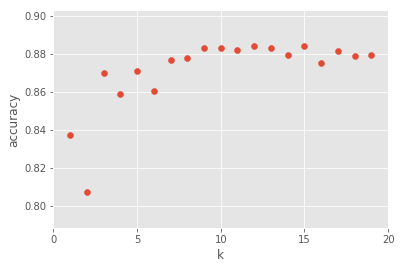

In [10]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])